<h1 style="text-align: center;">Notebook for DMD</h1>

In [3]:
import numpy as np
from scipy.linalg import svd, eig, pinv
from scipy.linalg import inv as inv
from scipy.sparse.linalg import svds
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import sys

# import DMD_JCL as DMD_JCL
# import importlib
# importlib.reload(DMD_JCL)
import importlib


import DMD
importlib.reload(DMD)
from DMD import DMD

import data_analysis
importlib.reload(data_analysis)

%matplotlib inline
matplotlib.pyplot.rc('text', usetex=True)

fontsize = 18

In [4]:
from data_analysis import Simulation
from data_analysis import compatible_path
current_directory = compatible_path('../')

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean, Tmean = simulation.import_data()

h, l = np.shape(x)
m = len(time)
print(m)

Running on Windows
Running on Windows
6249


# Jean-Christophe Loiseau' version

In [96]:
from DMD_JCL import dmd_analysis, evd_dmd


uf = np.zeros((u.shape[0],u.shape[1]*u.shape[2]))
for i in range(u.shape[0]):
  uf[i] = w[i].flatten()
print(u.shape,uf.shape,u.shape[1]+u.shape[2])

# --> apply DMD algorithm
rank = 10
sigma, P, Q = dmd_analysis(np.swapaxes(uf,0,1), y=None, rank=rank, rtol=1e-6)
print(P.shape,sigma.shape)
Phi, Psi, mu = evd_dmd(P, Q)
print(Phi.shape,mu.shape)

(6249, 81, 51) (6249, 4131) 132
(4131, 10) (10,)
(4131, 10) (10,)


In [98]:
# --> reconstruct dominant dynamical modes
eigenvalues = np.zeros((rank,))
modes = []
[modes.append([]) for i in range(rank)]
for i in range(rank):
  modes[i] = np.real(Phi[:,i])
  modes[i] = modes[i].reshape((u.shape[1],u.shape[2])) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [19]:
fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, umean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()

# Naive version

In [86]:
X = np.reshape(u,(m,h*l))
X = np.swapaxes(X, 0,1)
V1, V2 = X[:, :-1], X[:, 1:]

# First svd
U, Sigma, W = svd(V1, full_matrices=False)
W = W.T.conj()
Sigma_inv = pinv(np.diag(Sigma))
S = U.T.conj() @ V2 @ W @ Sigma_inv
eigenvalues, eigenvectors = eig(S)
Phi = np.zeros(np.shape(eigenvectors))
for i in range(np.shape(eigenvectors)[1]):
    Phi[i] = U @ eigenvectors[:,i]

/tmp/ipykernel_10017/2414125969.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[i] = U @ eigenvectors[:,i]


In [93]:
indices_of_max_values = eigenvalues.argsort()[-10:][::-1]
rank = 10

# TKE = np.sum(np.real(eigenvalues))
# KE_mode = []
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  # KE_mode.append(np.real(eigenvalues)[j]/TKE)
  modes[i] = np.real(U @ eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [ ]:
fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(rank)]
plt.tight_layout()
plt.show()

In [87]:
print(np.shape(S))

(4131, 4131)


#### First svd

In [10]:
print(np.shape(U), np.shape(np.swapaxes(U,0,1)))
V1 = np.swapaxes(U,0,1)
V1, V2 = V1[:, :-1], V1[:, 1:]

# First svd
U, Sigma, W = svd(V1, full_matrices=False)
W = W.T.conj()


(6249, 4131) (4131, 6249)


#### Calcul of S

In [5]:
print(np.shape(V1))
print(np.shape(U), np.shape(Sigma), np.shape(W))

(4131, 6248)
(4131, 4131) (4131,) (6248, 4131)


In [11]:
Sigma_inv = pinv(np.diag(Sigma))

In [ ]:
print(np.shape(U.T), np.shape(V2), np.shape(W), np.shape(Sigma_inv))

(4131, 4131) (4131, 6248) (6248, 4131) (4131, 4131)


In [12]:
S = U.T.conj() @ V2 @ W @ Sigma_inv

#### Eigenvectors

In [14]:
eigenvalues, eigenvectors = eig(S)

In [18]:
print(np.shape(eigenvectors), np.shape(U))

(4131, 4131) (4131, 4131)


In [15]:
Phi = np.zeros(np.shape(eigenvectors))
for i in range(np.shape(eigenvectors)[1]):
    Phi[i] = U @ eigenvectors[:,i]

/tmp/ipykernel_10017/3901067790.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[i] = U @ eigenvectors[:,i]


In [20]:
print( np.shape(Phi))

(4131, 4131)


In [8]:
indices_of_max_values = eigenvalues.argsort()[-10:][::-1]
rank = 10

# TKE = np.sum(np.real(eigenvalues))
# KE_mode = []
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  # KE_mode.append(np.real(eigenvalues)[j]/TKE)
  modes[i] = np.real(U @ eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [33]:
print(np.shape(wmean))

(6249, 81, 51)


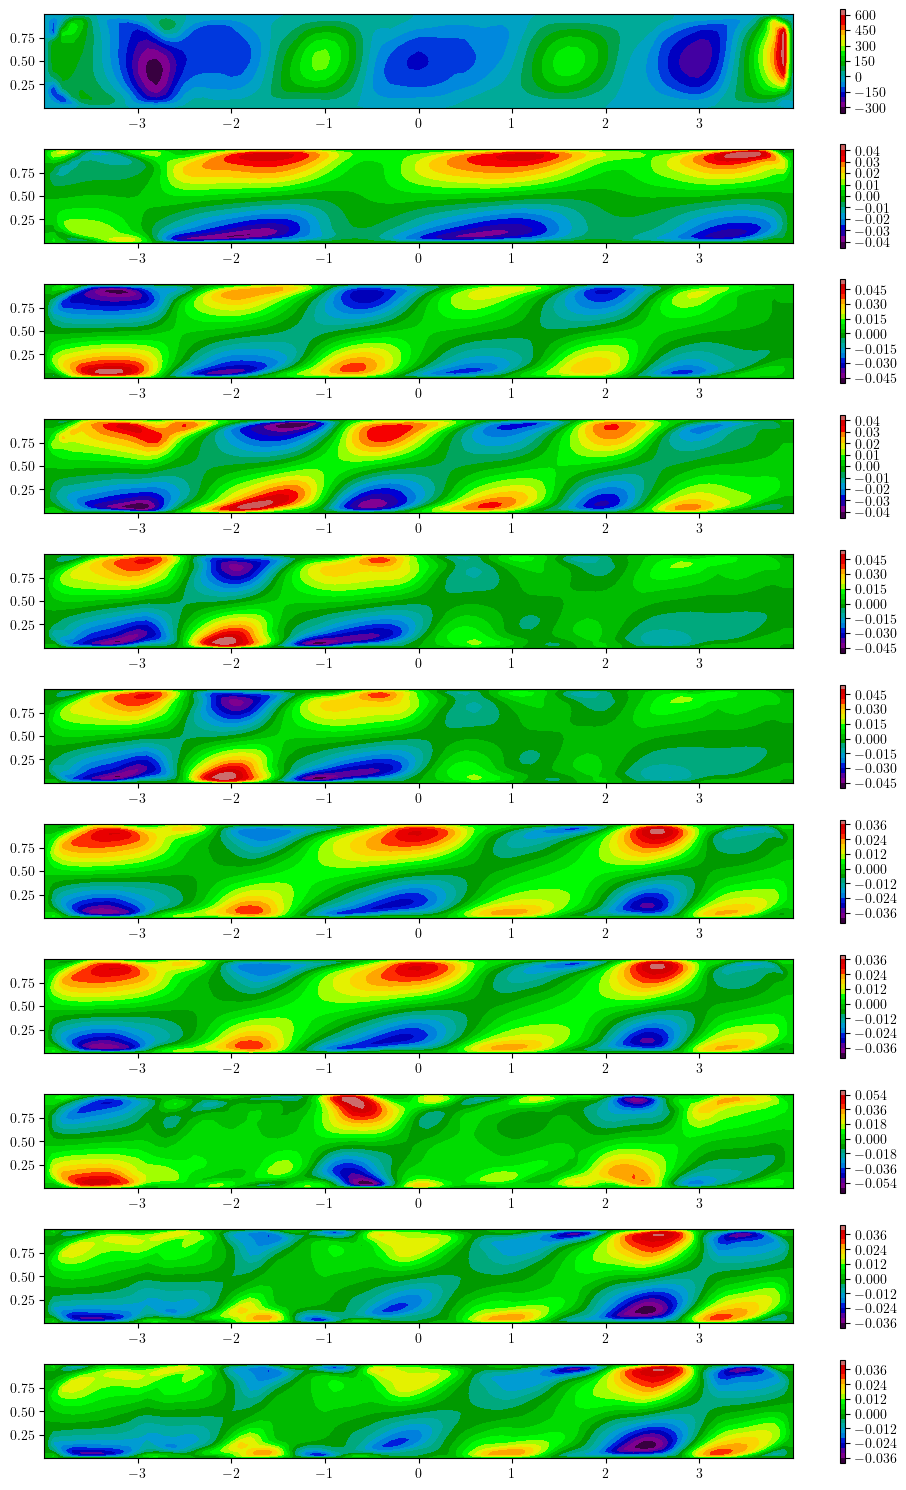

In [96]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(rank)]
plt.tight_layout()
plt.show()

# Cleaned

In [5]:
from DMD import DMD
dmd_uw = DMD(simulation)
dmd_uw.compute_dmd_uw()

dmd = DMD(simulation)
dmd.compute_dmd()

In [6]:
idx_sorted = np.argsort(np.abs(dmd.eigenvalues))[::-1]
idx_uw_sorted = np.argsort(np.abs(dmd_uw.eigenvalues))[::-1]



# Reconstruction

In [56]:
num_modes = 200
N_modes = np.arange(1, 6249, step = 200)
residuals = np.zeros(len(N_modes))
for i,j in enumerate(N_modes):
    print(i)
    reconstructed_data = dmd.reconstruct_data(idx_sorted[:j])
    residual = dmd.X - dmd.reconstructed_data
    r = np.linalg.norm(residual, 'fro')
    residuals[i] = r/np.linalg.norm(dmd.X, 'fro')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


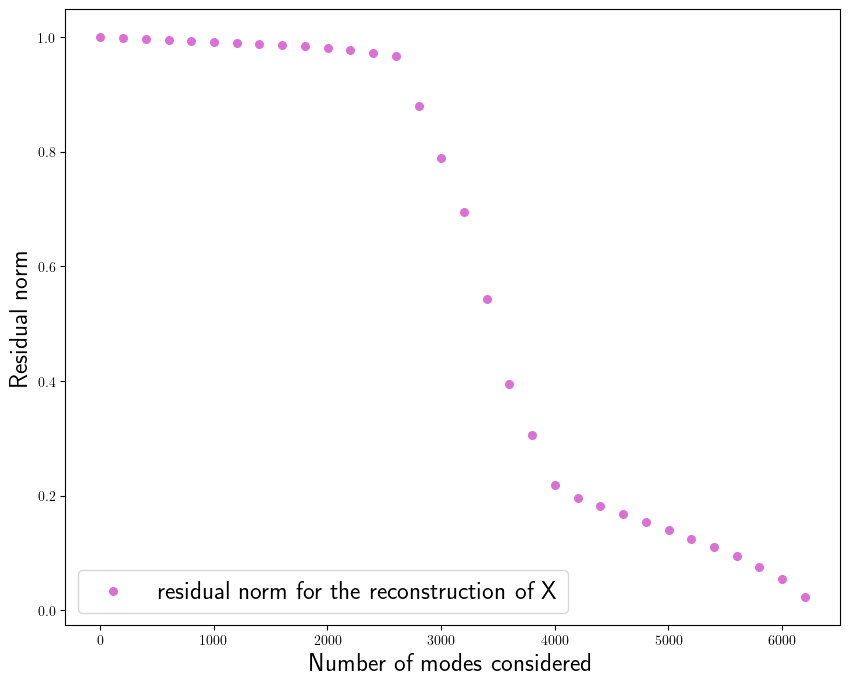

In [57]:
num_modes = 200
fig,ax = plt.subplots(figsize = (10, 8))

# N_modes = np.arange(1, num_modes + 1, step = 1)

ax.scatter(N_modes, residuals[:len(N_modes)], s = 30, c = 'orchid', label = r"residual norm for the reconstruction of X")
# ax.scatter(6249, residual, s = 30, c = 'orchid')

# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_xlabel('Number of modes considered', fontsize = fontsize)
# ax.set_ylim(bottom = 0.04, top = 0.05)
ax.legend(fontsize = fontsize)
# fig.tight_layout()
plt.show()
# plt.savefig('../results/DMD/residual_norm.png',dpi=300)

In [7]:
reconstructed_data = dmd.reconstruct_data(idx_sorted[:])


U_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,:h*l], (m,h,l))
W_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,h*l:2*h*l], (m,h,l))
T_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,2*h*l:], (m,h,l))

from data_analysis import Simulation
reconstructed_simulation = Simulation(current_directory)
reconstructed_simulation.reconstruct_simulation(U_reconstructed, W_reconstructed, T_reconstructed)

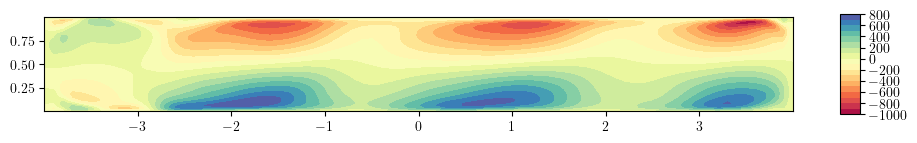

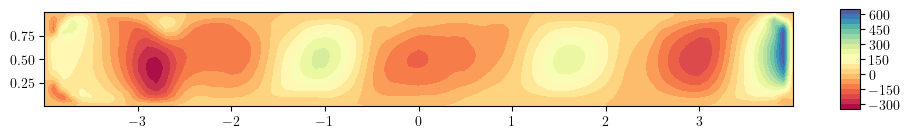

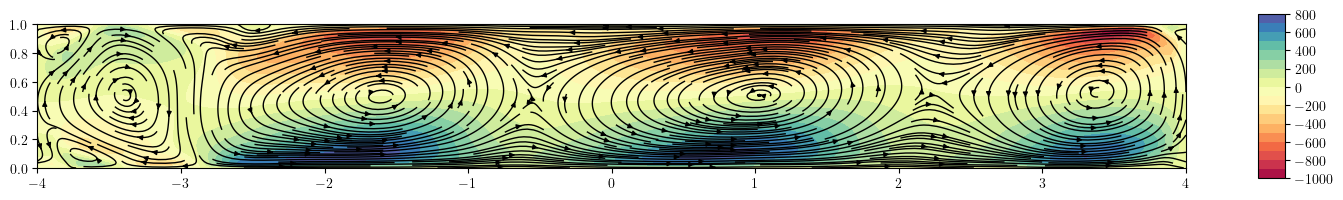

<Figure size 640x480 with 0 Axes>

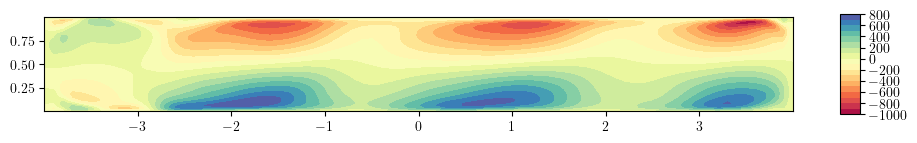

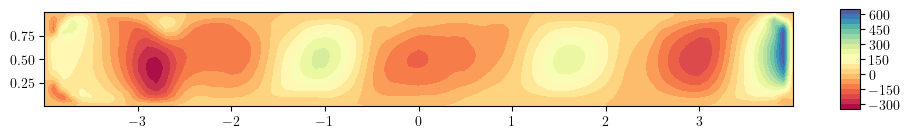

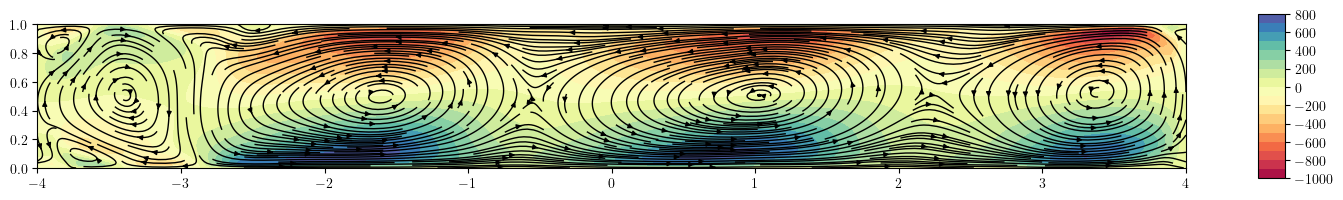

<Figure size 640x480 with 0 Axes>

In [10]:
reconstructed_simulation.plot_meancomponent("u")
plt.tight_layout()
reconstructed_simulation.plot_meancomponent("w")
plt.tight_layout()
reconstructed_simulation.plot_meanfield()
plt.tight_layout()

simulation.plot_meancomponent("u")
plt.tight_layout()
simulation.plot_meancomponent("w")
plt.tight_layout()
simulation.plot_meanfield()
plt.tight_layout()

In [14]:
num_modes

200

In [11]:
uz_reconstructed, uz_reconstructed_mean = reconstructed_simulation.UZ()
uz, uzmean = simulation.UZ()
KE_reconstructed = reconstructed_simulation.KE()

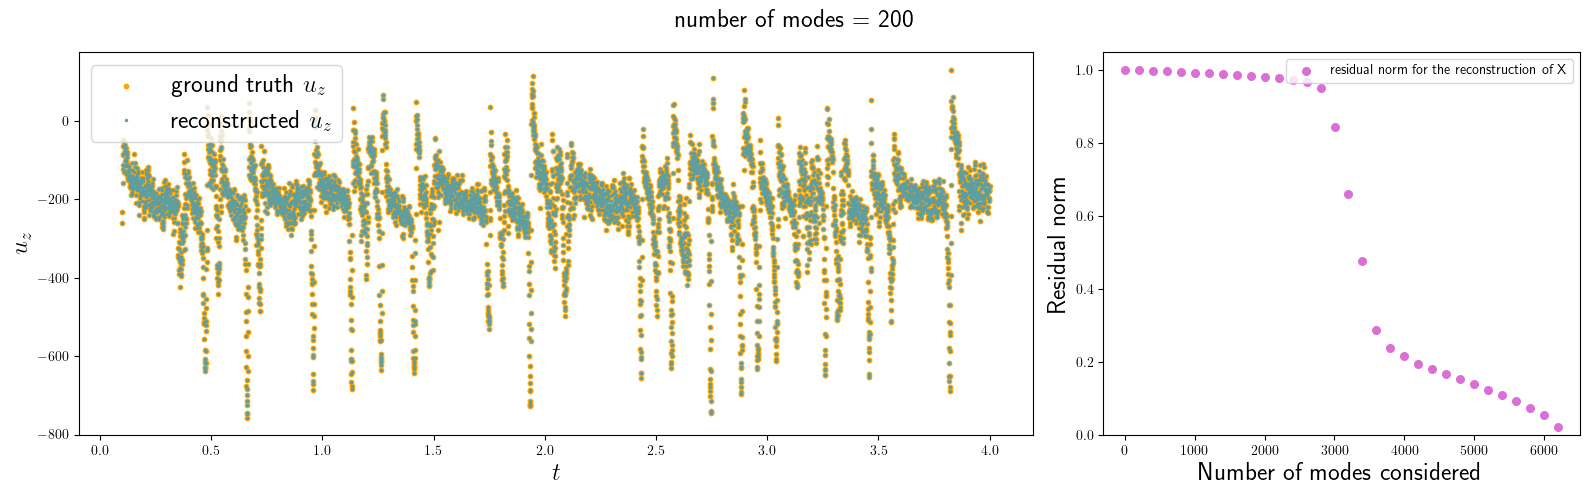

In [21]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize = (16, 5), gridspec_kw={'width_ratios': [2, 1]})


ax1.scatter(time, uz, s = 10, c = 'orange', label = r'ground truth $u_z$')
ax1.scatter(time, uz_reconstructed + uzmean, s = 2, c = 'cadetblue', label = r'reconstructed $u_z$')

ax1.set_ylabel(r'$u_z$', fontsize= fontsize)
ax1.set_xlabel(r'$t$', fontsize = fontsize)
ax1.legend(fontsize = fontsize, loc = 'upper left')


ax2.scatter(N_modes, residuals[:len(N_modes)], s = 30, c = 'orchid', label = r"residual norm for the reconstruction of X")


# ax.set_title(r"Residual norm")
ax2.set_ylabel('Residual norm', fontsize = fontsize)
ax2.set_xlabel('Number of modes considered', fontsize = fontsize)
ax2.set_ylim(bottom = 0)
ax2.legend(loc= "upper right")
fig.suptitle(f'number of modes = {num_modes} ', fontsize = fontsize)
fig.tight_layout()

In [32]:
def plot_uz(time, uz_reconstructed, uz, uzmean, N_modes,  num_modes, residuals_uw, fontsize):
    fig, [ax1,ax2] = plt.subplots(1,2,figsize = (16, 5), gridspec_kw={'width_ratios': [2, 1]})


    ax1.scatter(time, uz, s = 10, c = 'orange', label = r'ground truth $u_z$')
    ax1.scatter(time, uz_reconstructed + uzmean, s = 3, c = 'cadetblue', label = r'reconstructed $u_z$')
    ax1.set_ylabel(r'$u_z$', fontsize= fontsize)
    ax1.set_xlabel(r'$t$', fontsize = fontsize)
    ax1.legend(fontsize = fontsize, loc = 'upper left')


    # N_modes = np.arange(1, nmax + 1, step = 1)
    ax2.scatter(N_modes[:num_modes], residuals_uw[:num_modes], s = 30, c = 'orchid', label = r"residual norm for the reconstruction of stacked u and w")

    # ax.set_title(r"Residual norm")
    ax2.set_ylabel('Residual norm', fontsize = fontsize)
    ax2.set_xlabel('Number of modes considered', fontsize = fontsize)
    ax2.set_ylim(bottom = 0)
    ax2.legend(loc= "upper right")
    fig.suptitle(f'number of modes = {num_modes} ', fontsize = fontsize)
    fig.tight_layout()

In [59]:
N_modes = np.arange(1, 6248, step = 150)
residuals = np.zeros(len(N_modes))
for i,j in enumerate(N_modes):
    reconstructed_data = dmd.reconstruct_data(idx_sorted[:j])
    residual = dmd.X - dmd.reconstructed_data
    r = np.linalg.norm(residual, 'fro')
    residuals[i] = r/np.linalg.norm(dmd.X, 'fro')
    U_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,:h*l], (m,h,l))
    W_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,h*l:2*h*l], (m,h,l))
    T_reconstructed = simulation.T

    from data_analysis import Simulation
    reconstructed_simulation = Simulation(current_directory)
    reconstructed_simulation.reconstruct_simulation(U_reconstructed, W_reconstructed, T_reconstructed)
    uz_reconstructed, uz_reconstructed_mean = reconstructed_simulation.UZ()
    plot_uz(time, uz_reconstructed, uz, uzmean, N_modes, j, residuals, fontsize)
    plt.savefig(f'../results/DMD/uz/uz_{j}.png',dpi=300)
    plt.close()

In [55]:
from data_analysis import make_gif
make_gif('../results/DMD/uz/', '../results/DMD/uz/uz_DMD.gif', 10)

GIF created at: ../results/DMD/uz/uz_DMD.gif


## Sampling frequencies

### Distribution of frequencies

In [7]:
eigval_r = np.real(dmd.eigenvalues)
eigval_i = np.imag(dmd.eigenvalues)

eigvaluw_r = np.real(dmd_uw.eigenvalues)
eigvaluw_i = np.imag(dmd_uw.eigenvalues)

In [24]:
idx_pos_real = np.where(eigval_r < 0)
print(np.shape(idx_pos_real))
print(eigval_r[idx_pos_real])

(1, 3124)
[-0.67634661 -0.67634661 -0.707551   ... -0.11811776 -0.10112799
 -0.10112799]


In [28]:
print(np.shape(reconstructed_data))

(12393, 1, 6249)


In [26]:
N_modes = np.arange(1, 6248, step = 150)
residuals = np.zeros(len(N_modes))
for i,j in enumerate(N_modes):
    reconstructed_data = dmd.reconstruct_data(idx_pos_real[:j])
    print(i)
    residual = dmd.X - reconstructed_data

    r = np.linalg.norm(residual, 'fro')
    residuals[i] = r/np.linalg.norm(dmd.X, 'fro')
    U_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,:h*l], (m,h,l))
    W_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,h*l:2*h*l], (m,h,l))
    T_reconstructed = np.reshape(np.swapaxes(reconstructed_data, 0, 1)[:,2*h*l:3*h*l], (m,h,l))

    from data_analysis import Simulation
    reconstructed_simulation = Simulation(current_directory)
    reconstructed_simulation.reconstruct_simulation(U_reconstructed, W_reconstructed, T_reconstructed)
    uz_reconstructed, uz_reconstructed_mean = reconstructed_simulation.UZ()
    plot_uz(time, uz_reconstructed, uz, uzmean, N_modes, j, residuals, fontsize)
    plt.savefig(compatible_path(f'../results/DMD/uz/uz_{j}.png',dpi=300))
    plt.close()

0


MemoryError: Unable to allocate 6.98 TiB for an array with shape (12393, 12393, 6249) and data type float64

In [65]:
np.max(eigval_r)

0.9999994945147426

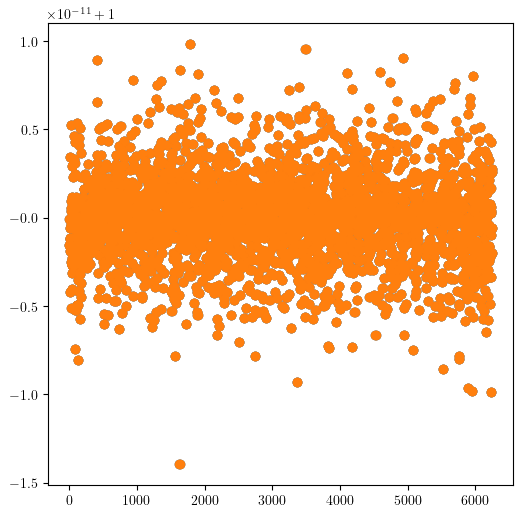

In [8]:
magnitudes = np.abs(dmd.eigenvalues)

fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(np.arange(1,len(magnitudes) + 1, step = 1), magnitudes)


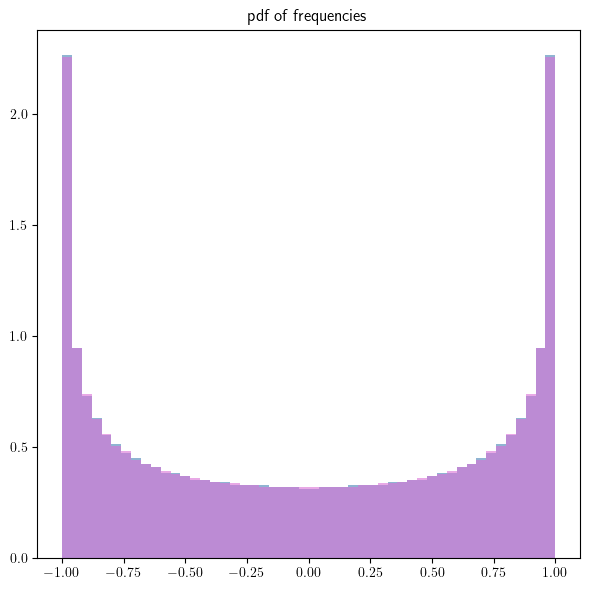

In [38]:
fig, ax = plt.subplots(figsize = (6,6))
ax.hist(eigval_i[np.where(eigval_r > 0)], bins=50, density=True, alpha=0.6, color='steelblue', histtype = 'bar')
ax.hist(eigval_i[np.where(eigval_r < 0)], bins=50, density=True, alpha=0.6, color='orchid', histtype = 'bar')
# ax.hist([uz[i] for i in min_indices], bins=20, density=True, alpha=0.6, color='orange',  histtype = 'bar')
# ax.set_yscale('log')
# ax.axvline(uz_mean, label = 'uzmean', c = 'k', linewidth = 2)
ax.set_title(f'pdf of frequencies')
plt.tight_layout()
plt.show()

## Eigenvalues

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


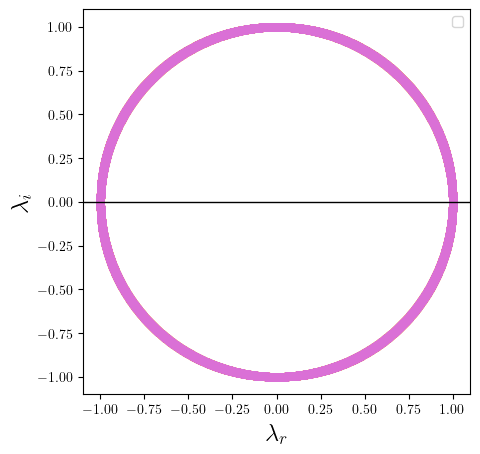

In [10]:
fig,ax = plt.subplots(figsize = (5,5))
i = 2091

N_snapshots = np.arange(3, 4003, step = 100)
N_snapshots_firsts = np.arange(3, 100, step = 10)
i = 2
ax.scatter(eigval_i, eigval_r, s = 30, c = 'orange')
ax.scatter(eigvaluw_i, eigvaluw_r, s = 30, c = 'orchid')
# ax.set_title(r"Residual norm")
ax.axhline(0, c = 'k', linewidth = 1)

ax.set_ylabel(r"$\lambda_i$", fontsize = fontsize)
ax.set_xlabel(r"$\lambda_r$", fontsize = fontsize)
ax.legend()
# fig.tight_layout()
# plt.show()
# plt.savefig('../results/DMD/residual_norm.png',dpi=300)

## Residual norm

In [ ]:
import copy
n_snapshots = len(simulation.time)
N_snapshots = np.arange(3, n_snapshots, step = 100)

simu = copy.copy(simulation)
residual_norms = []
for n in N_snapshots:
    print(n)
    simu.u = simulation.u[:n,:,:]
    simu.m = n
    dmd_simu = DMD(simu)
    Phi_simu = dmd_simu.compute_dmd()
    reconstructed_data_simu = dmd_simu.reconstruct_data()
    residual_norms.append(dmd_simu.residual_norm()/np.size(dmd_simu.X))

In [47]:
import copy
n_snapshots = 100
N_snapshots = np.arange(3, n_snapshots, step = 10)

simu = copy.copy(simulation)
residual_norms_firsts = []
for n in N_snapshots:
    print(n)
    simu.u = simulation.u[:n,:,:]
    simu.m = n
    dmd_simu = DMD(simu)
    Phi_simu = dmd_simu.compute_dmd()
    reconstructed_data_simu = dmd_simu.reconstruct_data()
    residual_norms_firsts.append(dmd_simu.residual_norm()/np.size(dmd_simu.X))

3
13
23
33
43
53
63
73


/home/julielimonet/Documents/Stage_M2/code/DMD.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[:,i] = self.U @ self.eigenvectors[:,i]


83
93


In [50]:
print(np.shape(N_snapshots_firsts))

(1,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


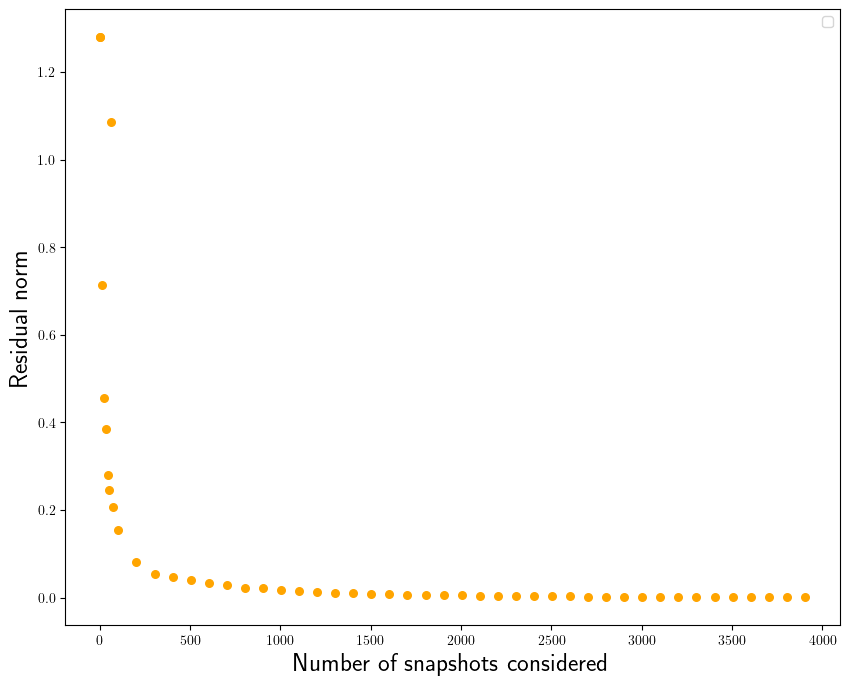

In [64]:
fig,ax = plt.subplots(figsize = (10, 8))
i = 2091

N_snapshots = np.arange(3, 4003, step = 100)
N_snapshots_firsts = np.arange(3, 100, step = 10)
i = 2
ax.scatter(N_snapshots, residual_norms, s = 30, c = 'orange')
ax.scatter(N_snapshots_firsts[:-i], residual_norms_firsts[:-i], s = 30, c = 'orange')
# ax.scatter(len(time), residual_norm/np.size(dmd.X), s = 30, c = 'orange')
# ax.axhline(residual_norm/np.size(dmd.X), label = 'uzmean', c = 'k', linewidth = 2)

# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_xlabel('Number of snapshots considered', fontsize = fontsize)
ax.legend()
# fig.tight_layout()
# plt.show()
plt.savefig('../results/DMD/residual_norm.png',dpi=300)

## Sort by magnitude

In [8]:
rank = 10
indices_of_max_values_u = dmd_u.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_u))


indices_of_max_values_w = dmd_w.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_w))

(10,)
(10,)


In [57]:
print(indices_of_max_values_u)
print(indices_of_max_values_w)

[  5   6   7  48  49  46  47 148 251 252]
[ 4  5  6  7  8  9 10 87 88 89]


In [82]:
dmd.eigenvalues[5]

(0.9991759518431554+0j)

In [84]:
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  modes[i] = np.real(dmd.U @ dmd.eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [33]:
modes_u = np.reshape(Phi_u, ( h, l, np.shape(Phi_u)[0]))
print(np.shape(modes_u))

modes_w = np.reshape(Phi_w,  ( h, l, np.shape(Phi_w)[0]))
print(np.shape(modes_w))

(81, 51, 4131)
(81, 51, 4131)


In [25]:
print(np.shape(Phi_u))

(4131, 4131)


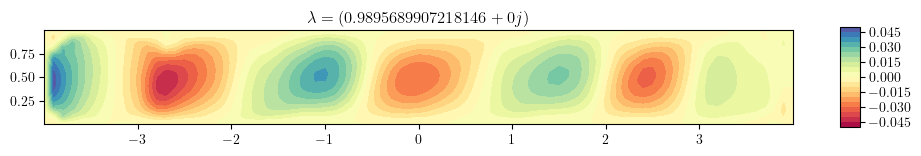

In [36]:
j = 0

indice = indices_of_max_values_u[j]

fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z, modes_w[:,:,indice], levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13)
ax.set_aspect('equal', 'box')
ax.set_title(r"$\lambda = {}$".format(dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/DMD/dmd_mode_w_{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

In [55]:
indices_of_max_values = (dmd_u.eigenvalues + dmd_w.eigenvalues).argsort()[-rank:][::-1]
print(indices_of_max_values)
print(indices_of_max_values_u)
print(indices_of_max_values_w)

[  5   6   7 701 700 702 645 646 699 703]
[  5   6   7  48  49  46  47 148 251 252]
[ 4  5  6  7  8  9 10 87 88 89]


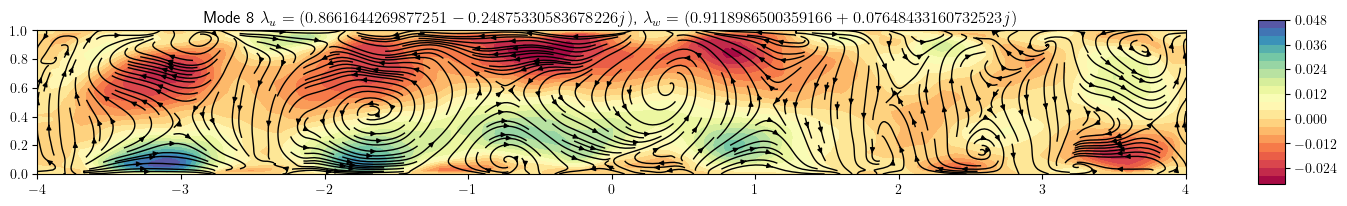

In [88]:
j = 8

indice = indices_of_max_values[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, modes_u[:,:,indice].T ,modes_w[:,:,indice].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice], dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/DMD/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
j = 3

indice_u = indices_of_max_values_u[j]
indice_w = indices_of_max_values_w[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, modes_u[:,:,indice_u].T ,modes_w[:,:,indice_w].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice_u], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice_u], dmd_w.eigenvalues[indice_w]))
plt.tight_layout()
# plt.savefig(f'../results/DMD/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

# On pure RB

In [91]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/data_pureRB'

simulation_rb = Simulation(current_directory, Ra = 8, Lambda = 0)
time, x, z, u, w, T, umean, wmean = simulation_rb.import_data()

h, l = np.shape(x)
m = len(time)

In [92]:
dmd_u = DMD(simulation)

Phi_u = dmd_u.compute_dmd(component= 'u')
reconstructed_data_u = dmd_u.reconstruct_data()
residual_norm_u = dmd_u.residual_norm()

dmd_w = DMD(simulation)

Phi_w = dmd_w.compute_dmd(component= 'w')
reconstructed_data_w = dmd_w.reconstruct_data()
residual_norm_w = dmd_w.residual_norm()

In [93]:
rank = 10
indices_of_max_values_u = dmd_u.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_u))


indices_of_max_values_w = dmd_w.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_w))

(10,)
(10,)


In [94]:
modes_u = np.reshape(Phi_u, ( h, l, np.shape(Phi_u)[0]))
print(np.shape(modes_u))

modes_w = np.reshape(Phi_w,  ( h, l, np.shape(Phi_w)[0]))
print(np.shape(modes_w))

(81, 51, 4131)
(81, 51, 4131)


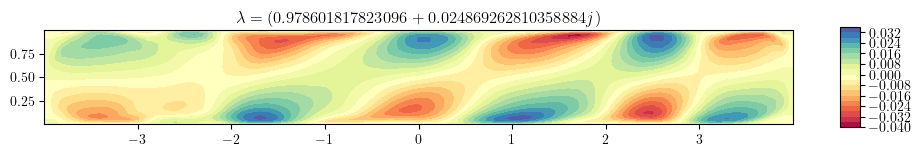

In [106]:
j = 2

indice = indices_of_max_values_u[j]

fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13)
ax.set_aspect('equal', 'box')
ax.set_title(r"$\lambda = {}$".format(dmd_u.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/pureRB/dmd_mode_u_{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

In [107]:
indices_of_max_values = (dmd_u.eigenvalues + dmd_w.eigenvalues).argsort()[-rank:][::-1]

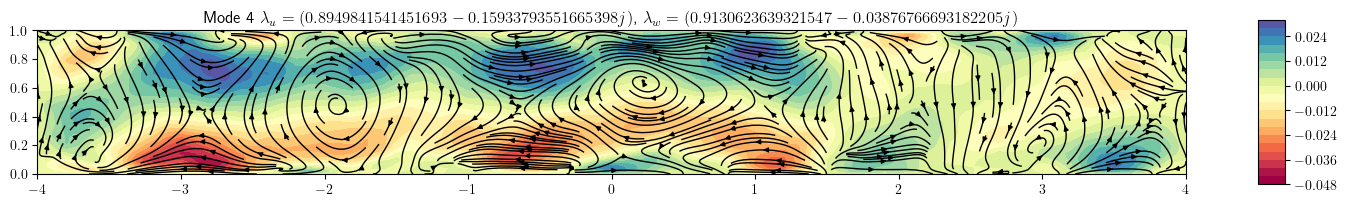

In [112]:
j = 4

indice = indices_of_max_values[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, modes_u[:,:,indice].T ,modes_w[:,:,indice].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice], dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/pureRB/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
j = 4

indice = indices_of_max_values[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, umean.T ,wmean.T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice], dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/pureRB/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()